In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fastapi uvicorn colabcode

In [3]:
import tensorflow as tf

In [4]:
from colabcode import ColabCode
server = ColabCode(port=10000, code=False)

In [5]:
import numpy as np

In [6]:
from tensorflow.keras import models

In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn

In [8]:
from pydantic import BaseModel

class Garbage(BaseModel):
    path: str
    class Config:
        schema_extra = {
            "example": {
                str:"/content/plastic1.jpeg"
            }
        }

In [11]:
from fastapi import FastAPI
import pickle

app = FastAPI()

@app.on_event("startup")
def load_model():
    global model
    model = models.load_model("/content/drive/MyDrive/gbg_clt.h5")

@app.get('/')
def index():
    return {'message': 'This is the homepage of the API '}


@app.post('/predict')
def get_garbage_category(data: Garbage):
    received = data.dict()
    path = received['path']
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (384,512))
    image=np.array(image)
    lst=[]
    lst.append(image)
    labels=["Carboard", "Glass", "Metal", "Paper", "Plastic", "Trash"]
    pred_name=labels[np.argmax(classifier.predict(np.array(lst)))]
    print(pred_name)
    return {'prediction': pred_name}

In [34]:
## Normal API Class
import cv2
import matplotlib.pyplot as plt


class API():
  def load_model():
    global model
    model = models.load_model("/content/drive/MyDrive/gbg_clt.h5")
    return model

  def index():
    return {'message': 'This is the homepage of the API '}


  def get_predictions(model_path, img_path):
    i=img_path
    model=models.load_model(model_path)
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (384,512))
    image=np.array(image)
    lst=[]
    lst.append(image)
    labels=["Carboard", "Glass", "Metal", "Paper", "Plastic", "Trash"]
    pred_name=labels[np.argmax(model.predict(np.array(lst)))]
    img=cv2.imread(i)
    print(plt.imshow(img))
    return {'prediction': pred_name}

AxesImage(54,36;334.8x217.44)


{'prediction': 'Plastic'}

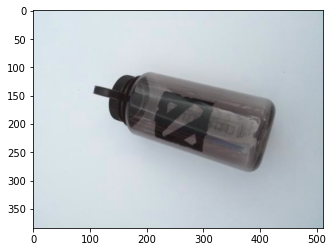

In [36]:
API.get_predictions("/content/drive/MyDrive/gbg_clt.h5", "/content/plastic1.jpg")